In [5]:
#Import Libraries & Load Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.feature_selection import SelectKBest, f_classif

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('US_Videos_Dataset.csv')

print("First 5 rows of the dataset:")
display(df.head())

print("\nDataset Info:")
print(df.info())

First 5 rows of the dataset:


,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,comment_count,thumbnail_link,comments_disabled,description,is_trending
0,G4M_621v1As,college farewell video#trending #viralshorts,2025-04-12T02:06:42Z,UC7k_7IF3s3TY-cowwxs_yWw,Vk_07_rider,22.0,2025-11-08,"college farewell video, DDU farewell video, fa...",125784084.0,1557178.0,1583.0,https://i.ytimg.com/vi/G4M_621v1As/default.jpg,0,DDU farewell party video \n college farewell v...,1
1,z2voqo_Jhx4,Busking in Manchester 🇬🇧 #blindfaith #guitar #...,2025-04-06T11:35:53Z,UCM_9JHB3xXPSzJfTkD86AtA,Leonardo Patrick,10.0,2025-11-08,NaN,94744011.0,925529.0,5849.0,https://i.ytimg.com/vi/z2voqo_Jhx4/default.jpg,0,NaN,1
2,jHIt9oHFLsw,This is what happens when you play Star Wars i...,2025-04-06T10:07:12Z,UC4YyKY5o60Kckk-GXOnhT2g,Violin Phonix,22.0,2025-11-08,NaN,61945818.0,1067412.0,4124.0,https://i.ytimg.com/vi/jHIt9oHFLsw/default.jpg,0,Full video : https://www.youtube.com/watch?v=Q...,1
3,gwRqLbWqKlM,LISA - FUTW (YouTube Music Nights Special Stag...,2025-03-19T03:29:33Z,UC6-BgjsBa5R3PZQ_kZ8hKPg,LLOUD Official,10.0,2025-11-08,"Blackpink, Lisa, Music, Fashion, K-Pop, kpop, ...",14555963.0,455816.0,20396.0,https://i.ytimg.com/vi/gwRqLbWqKlM/default.jpg,0,"LISA’s debut album, ‘Alter Ego’ is out now. Li...",1
4,prpRoyrutcE,Uljhi hai yeh kis jaal me tu…. Bengaluru ❤️,2025-04-14T10:17:58Z,UCiFXnvi8ESDukE25ol2foWQ,Mr.KiranJ,10.0,2025-11-08,NaN,26204942.0,336267.0,2333.0,https://i.ytimg.com/vi/prpRoyrutcE/default.jpg,0,NaN,1



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395915 entries, 0 to 395914
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   video_id           395915 non-null  object 
 1   title              395915 non-null  object 
 2   publishedAt        390064 non-null  object 
 3   channelId          395915 non-null  object 
 4   channelTitle       395911 non-null  object 
 5   categoryId         395898 non-null  float64
 6   trending_date      177532 non-null  object 
 7   tags               272004 non-null  object 
 8   view_count         395898 non-null  float64
 9   likes              395898 non-null  float64
 10  comment_count      395898 non-null  float64
 11  thumbnail_link     395915 non-null  object 
 12  comments_disabled  395915 non-null  int64  
 13  description        334405 non-null  object 
 14  is_trending        395915 non-null  int64  
dtypes: float64(4), int64(2), object(9)
m

In [6]:
import sys
!{sys.executable} -m pip install seaborn pandas numpy matplotlib scikit-learn


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
# Data Cleaning & Feature Selection

cols_to_drop = ['video_id', 'title', 'publishedAt', 'channelId',
                'channelTitle', 'tags', 'thumbnail_link',
                'description', 'trending_date']

df_clean = df.drop(columns=cols_to_drop, errors='ignore')

df_clean.dropna(inplace=True)

print(f"Data shape after cleaning: {df_clean.shape}")

X = df_clean.drop(columns=['is_trending']) # كل البيانات ما عدا الهدف
y = df_clean['is_trending']                # الهدف فقط

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# (Unique Step): Feature Selection

print("\nPerforming Feature Selection (SelectKBest)...")

selector = SelectKBest(score_func=f_classif, k=4)

X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

selected_indices = selector.get_support(indices=True)
selected_features = X.columns[selected_indices]

print("Original Features:", list(X.columns))
print("Selected Best Features:", list(selected_features))

Data shape after cleaning: (395898, 6)

Performing Feature Selection (SelectKBest)...
Original Features: ['categoryId', 'view_count', 'likes', 'comment_count', 'comments_disabled']
Selected Best Features: ['categoryId', 'view_count', 'comment_count', 'comments_disabled']


--- Round 1: Using ALL Features ---
Training GaussianNB on All Features...
Training SGDClassifier on All Features...

--- Round 2: Using SELECTED Features ---
Training GaussianNB on Selected Features...
Training SGDClassifier on Selected Features...

FINAL COMPARISON TABLE
            Model                   Data  Accuracy
0     Naive Bayes  All Features (5 cols)  0.580778
1  SGD Classifier  All Features (5 cols)  0.546918
2     Naive Bayes      Selected (4 cols)  0.567189
3  SGD Classifier      Selected (4 cols)  0.748472


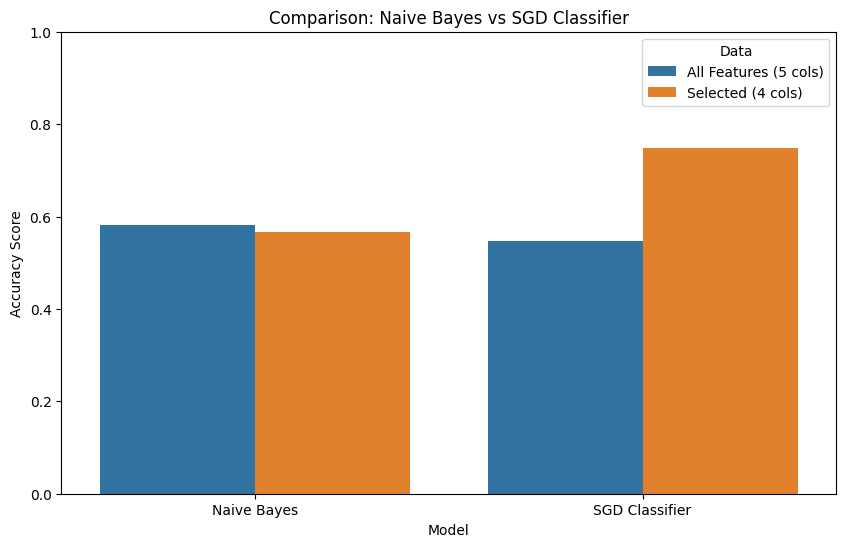

In [12]:
# Model Training with NEW Models (Naive Bayes & SGD)

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier

def train_and_evaluate(model, X_train_data, X_test_data, y_train_data, y_test_data, dataset_name):
    print(f"Training {model.__class__.__name__} on {dataset_name}...")
    model.fit(X_train_data, y_train_data)
    y_pred = model.predict(X_test_data)
    acc = accuracy_score(y_test_data, y_pred)
    return acc


model_nb = GaussianNB()
model_sgd = SGDClassifier(max_iter=1000, random_state=42)
results = []

#  (All Features)
print("--- Round 1: Using ALL Features ---")

# Naive Bayes
acc_nb_all = train_and_evaluate(model_nb, X_train, X_test, y_train, y_test, "All Features")
results.append({"Model": "Naive Bayes", "Data": "All Features (5 cols)", "Accuracy": acc_nb_all})

# SGD Classifier
acc_sgd_all = train_and_evaluate(model_sgd, X_train, X_test, y_train, y_test, "All Features")
results.append({"Model": "SGD Classifier", "Data": "All Features (5 cols)", "Accuracy": acc_sgd_all})

# (Selected Features)
print("\n--- Round 2: Using SELECTED Features ---")

# Naive Bayes
acc_nb_sel = train_and_evaluate(model_nb, X_train_selected, X_test_selected, y_train, y_test, "Selected Features")
results.append({"Model": "Naive Bayes", "Data": "Selected (4 cols)", "Accuracy": acc_nb_sel})

# SGD Classifier
acc_sgd_sel = train_and_evaluate(model_sgd, X_train_selected, X_test_selected, y_train, y_test, "Selected Features")
results.append({"Model": "SGD Classifier", "Data": "Selected (4 cols)", "Accuracy": acc_sgd_sel})


results_df = pd.DataFrame(results)
print("\n" + "="*40)
print("FINAL COMPARISON TABLE")
print("="*40)
print(results_df)

plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x="Model", y="Accuracy", hue="Data")
plt.title("Comparison: Naive Bayes vs SGD Classifier")
plt.ylim(0.0, 1.0)
plt.ylabel("Accuracy Score")
plt.show()